# Алгоритм имитации отжига
https://ru.wikipedia.org/wiki/Алгоритм_имитации_отжига

In [2]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from pylab import *


mul_norm = vectorize(lambda s: np.random.normal(0, s))


def sim_ann(f, x, jump, iters=300, Q_max = 20, Q_min = 0.01, way=False, back=False):
    '''Simulated annealing
    
    Args:
        f: function for minimizing
        x (vector): starting position
        jump (nonnegative vector): max jump from old position
        iters (int): number of iterations
        Q_max, Q_min (float): max and min "temperature" 
        way (bool): save optimization history?
        back (bool): roll back from "bad" points?
    
    Return:
        fm (double): global min
        xm (vector): argmin
        w (matrix iters*n): checkpoints (if way==False)'''
    fm = f(x) # global maximum
    xm = x
    f0 = fm
    x0 = xm
    w = array([x0])
    
    n = len(x)
    for Q in linspace(Q_max,Q_min,iters):
        
        x1 = x0 + mul_norm(jump)
        f1 = f(x1)
        if f1 < f0:
            f0 = f1
            x0 = x1
            if f1 < fm:
                fm = f1
                xm = x1
        elif np.random.random() <= exp(-(f1-f0)/f1/Q):
            f0 = f1
            x0 = x1
            
        if way:
            w = concatenate([w,[x1]])
        if back and np.random.random() > exp(-(f0-fm)/f0/Q):
            b = (len(w)-np.where(w-xm==0)[0][0])
            w = concatenate([w[:-b],[w[-b]]*b])
            f0 = fm
            x0 = xm
            
    if way:
        return fm, xm, w
    else:
        return fm, xm

In [3]:
rosen = lambda x,y: (1.0 - x)**2 + 100.0 * (y - x*x)**2
Rosen = lambda x: rosen(x[0],x[1])

<IPython.core.display.Javascript object>


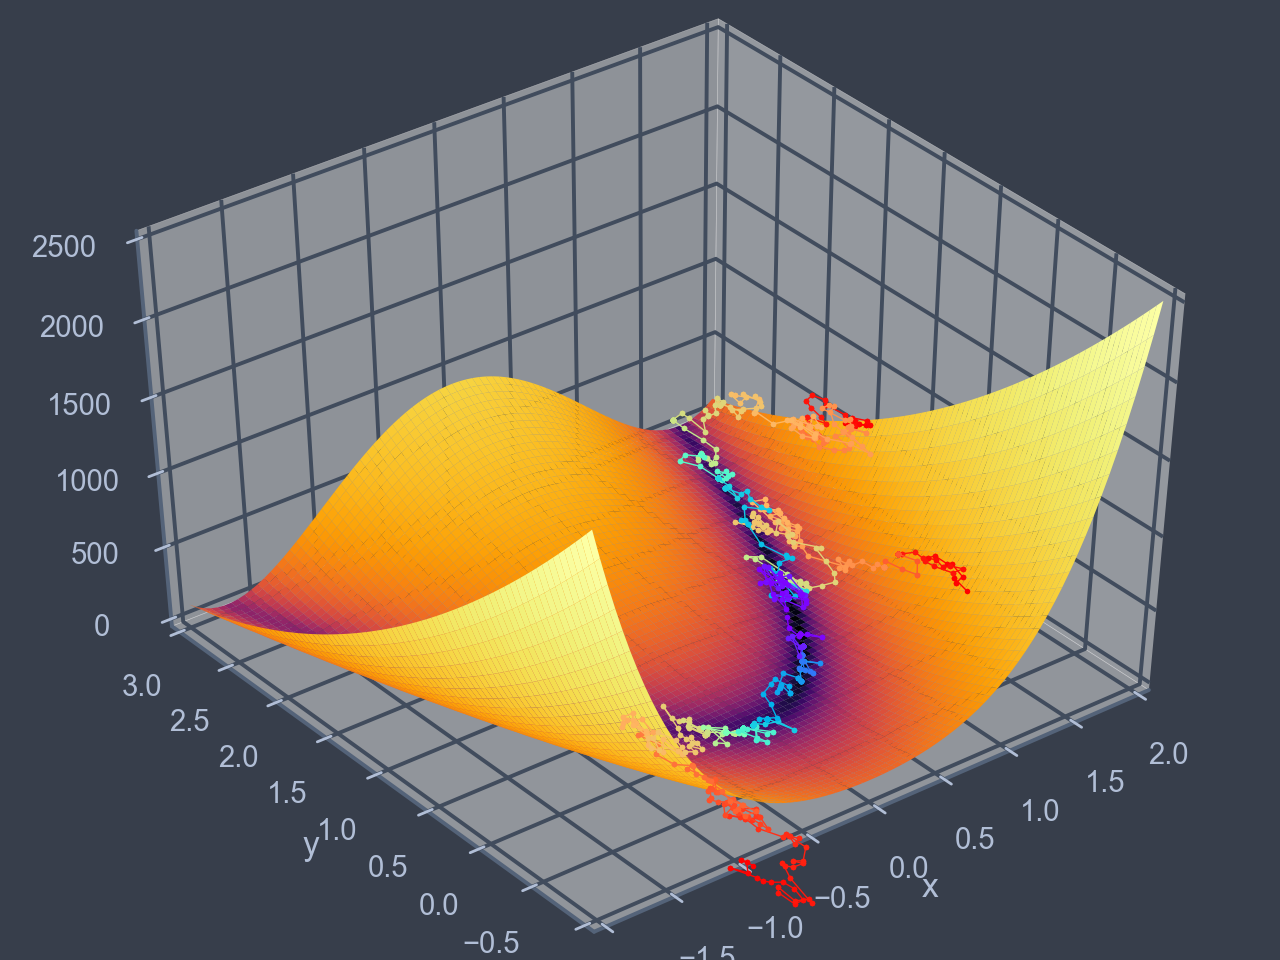

In [7]:
##########
## Code for the figure
##########

%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import inferno as colormap
from matplotlib.colors import LogNorm

fig = plt.figure()
fig.clf()
ax = Axes3D(fig, azim=-128.0, elev=43.0)

s = 0.05
x = np.arange(-2.0, 2.0 + s, s)
y = np.arange(-1.0, 3.0 + s, s)
X, Y = np.meshgrid(x, y)
Z = rosen(X,Y)

# Without using `` linewidth=0, edgecolor='none' '', the code may produce a
# graph with wide black edges, which will make the surface look much darker.
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, norm=LogNorm(),
                cmap=colormap, linewidth=0, edgecolor='none')

ax.set_xlim([-2, 2])
ax.set_ylim([-1, 3])
ax.set_zlim([0, 2500])

ax.set_xlabel("x")
ax.set_ylabel("y")

#fig.savefig("Rosenbrock function.svg")
plt.show()
##########

In [8]:
from time import time

T = 500
tries = 3
for t in range(tries):
    time0 = time()
    X0 = [0,1]+mul_norm([2,2])
    print('starting point',X0)
    f_min, x_min, w = sim_ann(Rosen, X0, [0.05,0.1], 
                              iters=T, way=True, back=True)
    print(f_min, x_min)
    print('time:',round(time()-time0,3),'sec')
    print()
    
    color=iter(cm.rainbow(np.linspace(1,0,T)))
    for q in range(1,T):
        c=next(color)
        plot(w[q-1:q+1,0], w[q-1:q+1,1], '-o', c=c, linewidth=0.5, markersize=2)

starting point [-0.99543812 -1.16884913]
0.0495787630332 [ 0.78892943  0.61531882]
time: 0.022 sec

starting point [ 1.8928186   0.37603479]
2.00460894907e-05 [ 0.99938785  0.99921961]
time: 0.024 sec

starting point [ 2.5773013   2.38642465]
0.00567805415365 [ 1.07445221  1.15560912]
time: 0.022 sec

